<h1> Sleep Health and Lifestyle </h1>

![Alt Text](Sleep_picture.jpg)

<h2> The Problem </h2>

Living in today's fast-paced world, sleep has become an overlooked components of our health. Poor sleep habits, rising stress levels, and sedantary routines and increasinly linked to various chronic health problems, however the roots of these sleep habits and disorders remained complex and multidimensional.

With this, organization and healthcare providers may need data-driven insights to understand different aspects that contribute to poor sleep, how it differentiates between different demographics, and what interventions are possible that might improve health outcomes.

🔍 
<i>How can we identify and address the key factors influencing poor sleep quality and sleep disorders across different demographics to support healthier living?</i>

<h3> Dataset Overview </h3>

The dataset consists of 400 indviduals and includes the following variables:

- Demographics: Person ID, Age, Gender, Occupation
- Sleep Metrics: Sleep Duration, Quality of Sleep (1-10), Sleep Disorder type
- Health Indicators: BMI Category, Blood Pressure, Heart Rate (bpm)
- Lifestyle Factors: Physical Activity (minutes/day), Stress Level (scale 1-10),

<h3> Analytical Questions </h3>

1. Which factors are most associated with low sleep quality?
2. How do sleep disorders vary by age, gender, and occupation?
3. Is there a link between physical activity, stress levels, and sleep duration?
4. Do individuals with better cardiovascular indicators (e.g. lower heart rate, normal blood pressure) sleep better?
5. What lifestyle patterns distinguish individuals without sleep disorders from those with insomnia or apnea?

<i>Source of dataset: <a>https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset</a></i>

<h4> Importing Packages and Loading the Dataset </h4>

In [24]:
#Importing packages and loading the dataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Load the data
sleep = pd.read_csv('sleep.csv')
sleep.set_index('Person ID', inplace=True)

<h4> Cleaning the Dataset </h4>

In [25]:
sleep_transformed = sleep.copy()

# Transform the data
sleep_transformed['Gender'] = sleep_transformed['Gender'].astype('category')
sleep_transformed['Age'] = sleep_transformed['Age'].astype('int16')
sleep_transformed['Occupation'] = sleep_transformed['Occupation'].astype('category')
sleep_transformed['Sleep Duration (hours)'] = sleep_transformed['Sleep Duration (hours)'].astype('float32')
sleep_transformed['Physical Activity Level (minutes/day)'] = sleep_transformed['Physical Activity Level (minutes/day)'].astype('int16')
sleep_transformed['BMI Category'] = sleep_transformed['BMI Category'].astype('category')
sleep_transformed['Heart Rate (bpm)'] = sleep_transformed['Heart Rate (bpm)'].astype('int16')
sleep_transformed['Daily Steps'] = sleep_transformed['Daily Steps'].astype('int16')
sleep_transformed['Sleep Disorder'] = sleep_transformed['Sleep Disorder'].astype('category')

# Reorder the categories
sleep_transformed['BMI Category'] = sleep_transformed['BMI Category'].cat.set_categories(new_categories = ['Underweight', 'Normal', 'Overweight', 'Obese'], ordered = True)


#Checking data types
print(sleep_transformed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 400 non-null    category
 1   Age                                    400 non-null    int16   
 2   Occupation                             400 non-null    category
 3   Sleep Duration (hours)                 400 non-null    float32 
 4   Quality of Sleep (scale: 1-10)         400 non-null    float64 
 5   Physical Activity Level (minutes/day)  400 non-null    int16   
 6   Stress Level (scale: 1-10)             400 non-null    int64   
 7   BMI Category                           400 non-null    category
 8   Blood Pressure (systolic/diastolic)    400 non-null    object  
 9   Heart Rate (bpm)                       400 non-null    int16   
 10  Daily Steps                            400 non-null    int16   
 11

<h4>Exploratory Data Analysis</h4>

<h2>❔<i> What factors are most associated with low sleep quality?</i></h2>

<Axes: >

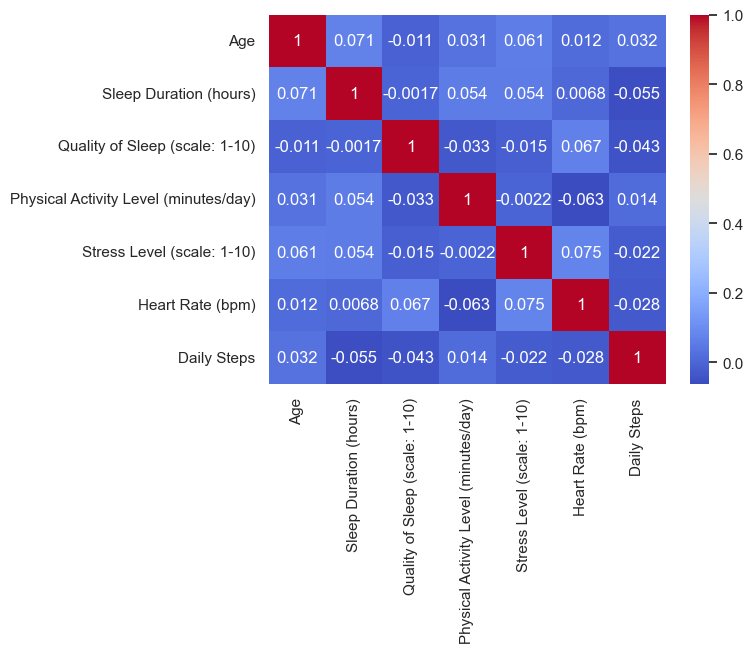

In [26]:
corr = sleep_transformed.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: >

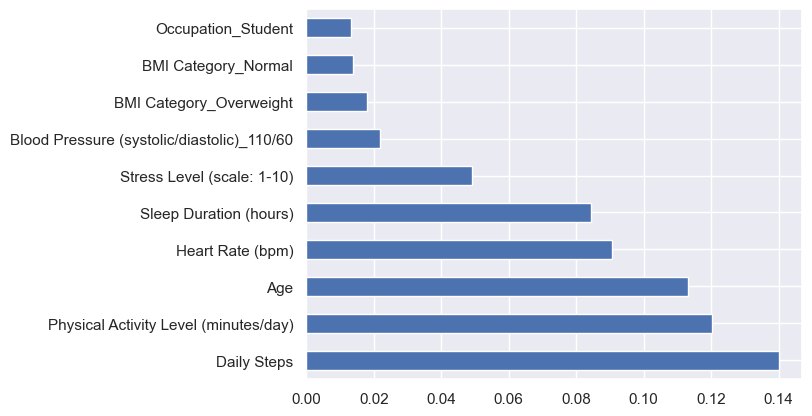

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

sleep_encoded = pd.get_dummies(sleep_transformed, drop_first=True)

# Prepare data
X = sleep_encoded.drop(columns=['Quality of Sleep (scale: 1-10)'])
y = sleep_encoded['Quality of Sleep (scale: 1-10)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')

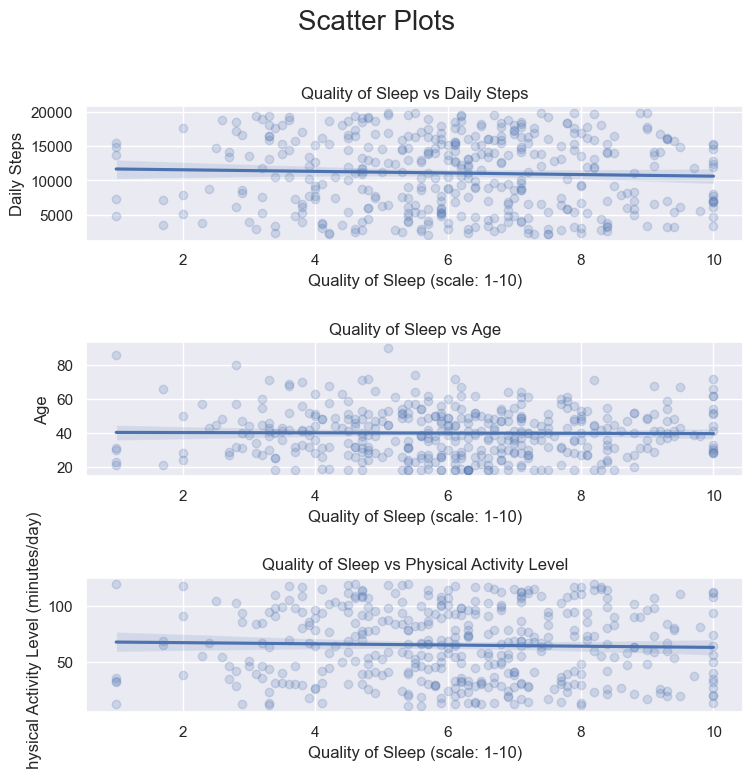

In [ ]:
fig1, axes1 = plt.subplots(3, figsize = (8,8))
sns.set_theme(font_scale = 1)

ax1 = sns.regplot(x = 'Quality of Sleep (scale: 1-10)', y = 'Daily Steps', data = sleep_transformed, ax= axes1[0], scatter_kws={'alpha' : 0.2})
ax1.set_title('Quality of Sleep vs Daily Steps')

ax2 = sns.regplot(x = 'Quality of Sleep (scale: 1-10)', y = 'Age', data = sleep_transformed, ax= axes1[1], scatter_kws={'alpha' : 0.2})
ax2.set_title('Quality of Sleep vs Age')

ax3 = sns.regplot(x = 'Quality of Sleep (scale: 1-10)', y = 'Physical Activity Level (minutes/day)', data = sleep_transformed, ax= axes1[2], scatter_kws={'alpha' : 0.2})
ax3.set_title('Quality of Sleep vs Physical Activity Level')

fig1.suptitle('Scatter Plots', fontsize = 20)
fig1.tight_layout(pad=2.0)
plt.show()

<h3>Insight</h3>

According to the Random Forest Regressor and the Regression Plot, the factors that are most associated with sleep quality are those which involves physical activity like Daily Steps and Physical Activity Level which contributes to around 25~27% of model's prediction of sleep quality. Age can also be included to the list of factors that can be associated with sleep quality.

<h2>❔<i>How do sleep disorders vary by age, gender, occupation?</i></h2>

Text(0.5, 1.0, 'Sleep Disorder by Age')

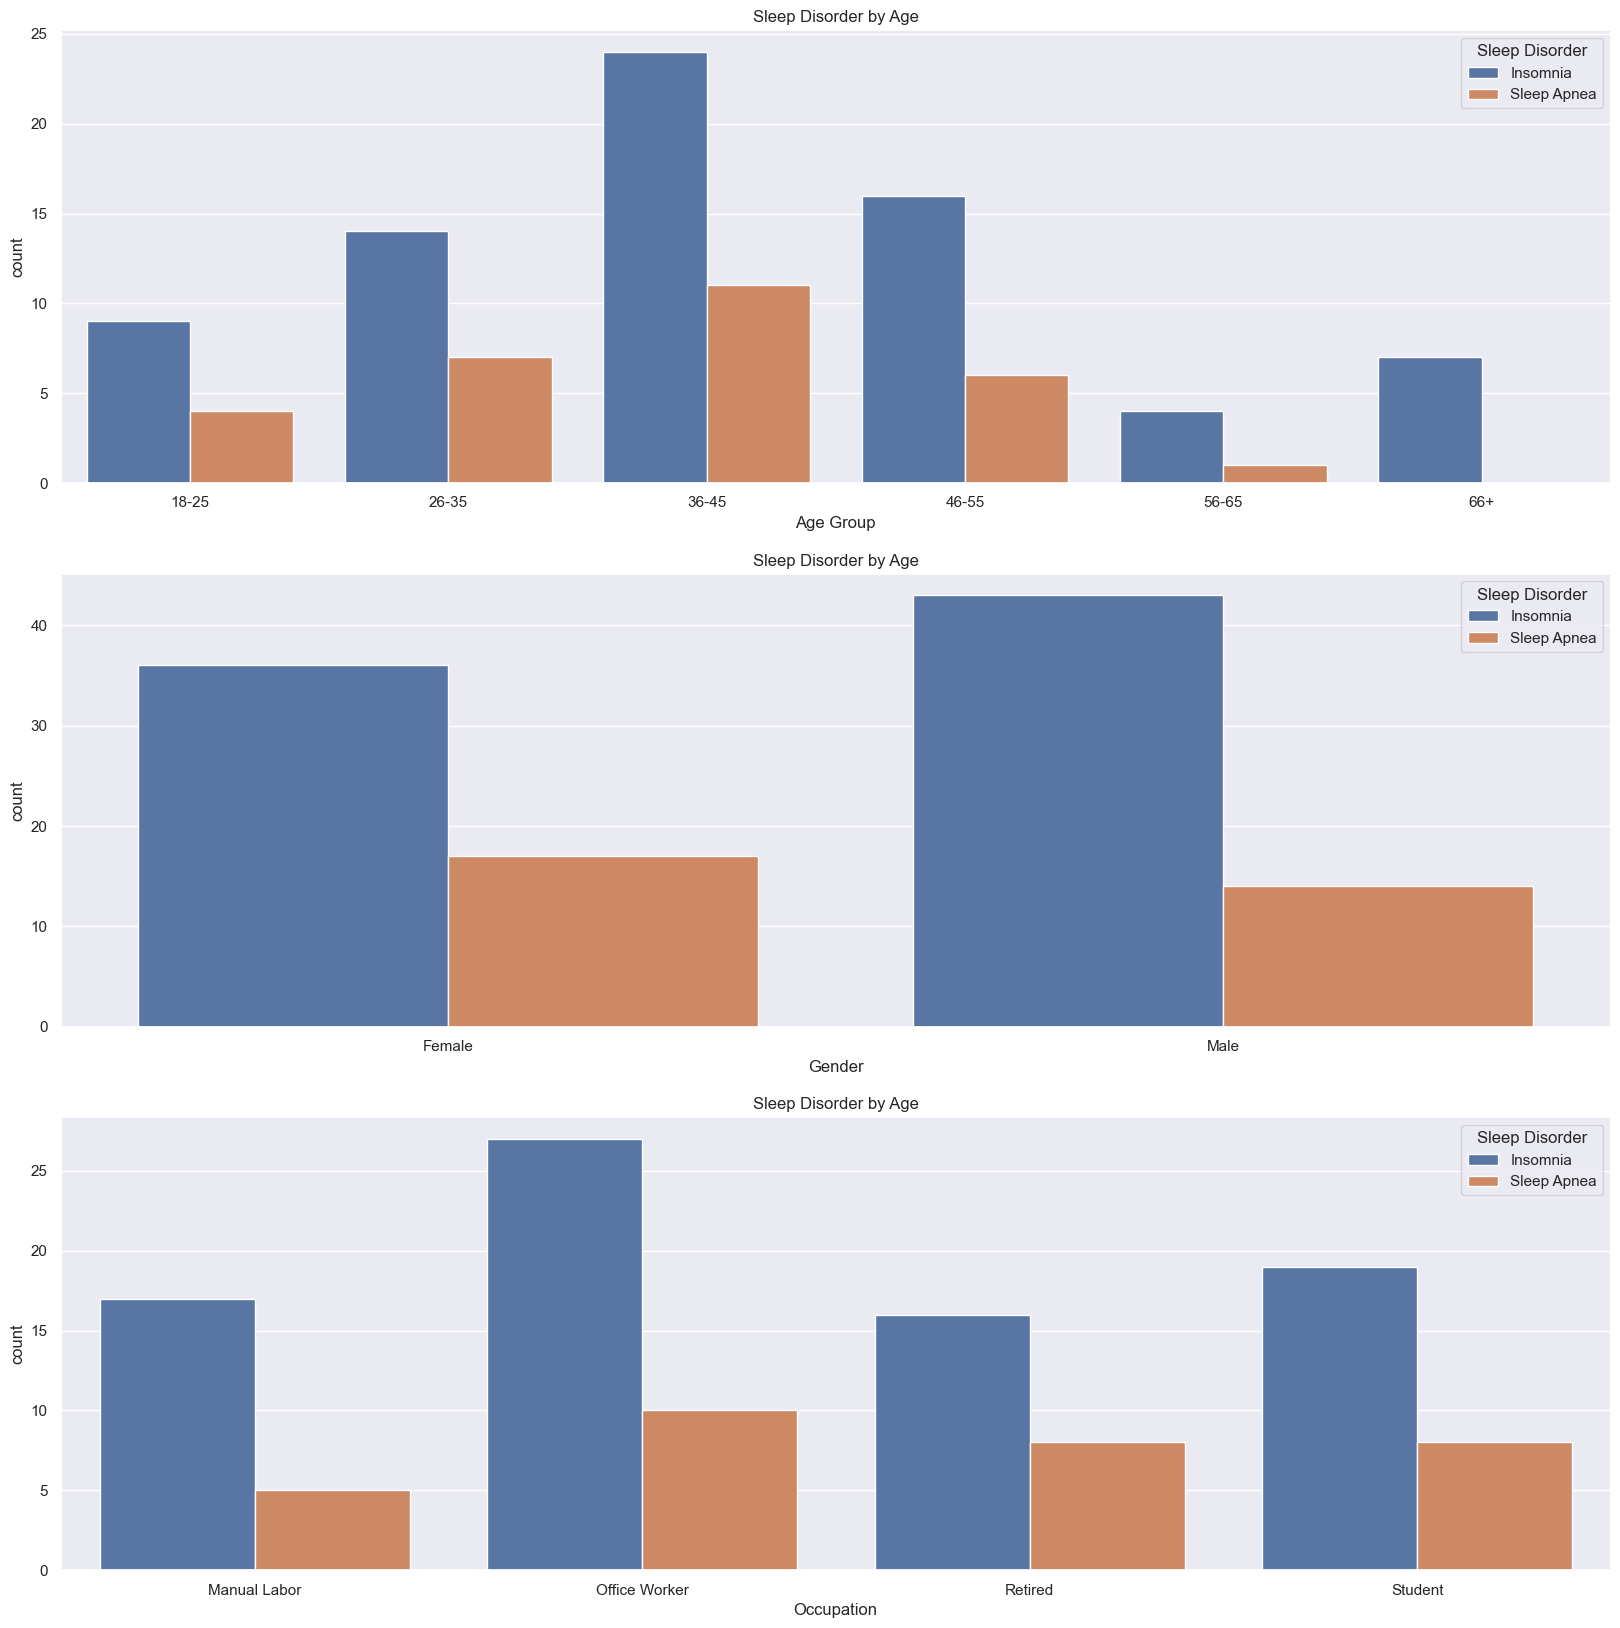

In [48]:
fig2, axes2 = plt.subplots(3, figsize = (20,20))
sns.set_theme(font_scale = 1)

sleep_transformed['Age Group'] = pd.cut(sleep_transformed['Age'], bins=[18,25,35,45,55,65,80], labels = ['18-25', '26-35', '36-45','46-55', '56-65', '66+'])
ax4 = sns.countplot(x = 'Age Group', hue = 'Sleep Disorder', data = sleep_transformed, ax= axes2[0])
ax4.set_title('Sleep Disorder by Age')

ax5 = sns.countplot(x = 'Gender', hue = 'Sleep Disorder', data = sleep_transformed, ax= axes2[1])
ax5.set_title('Sleep Disorder by Age')

ax6 = sns.countplot(x = 'Occupation', hue = 'Sleep Disorder', data = sleep_transformed, ax= axes2[2])
ax6.set_title('Sleep Disorder by Age')

<h3>Insight</h3>

Sleep disorders varies between different demographic groups. For instance, Male participants suffer more from Insomnia than Female participants, however, Female participants suffer more from Sleep Apnea than the Males. 36-45 year old participants suffer from both sleeping disorders than the other age groups. Interestingly, participants aged more than 66 years old don't suffer from Sleep Apnea. When it comes to occupation, Office Workers suffer the most from Insomnia and Sleep Apnea. Students are next in line from suffering the most in Insomnia. Generally, Insomnia is shown to be more prevalent than Sleep Apnea in all demographic factors.

We can deduct that partipants who are engaged with their work and academics are more prone to sleeping disorders. Especially those who are male in their 30s-40s. This may be caused by the pressure that comes from their working environment.

<h3>❔<i>Is there a link between physical actvity, stress levels, and sleep duration?</i></h3>

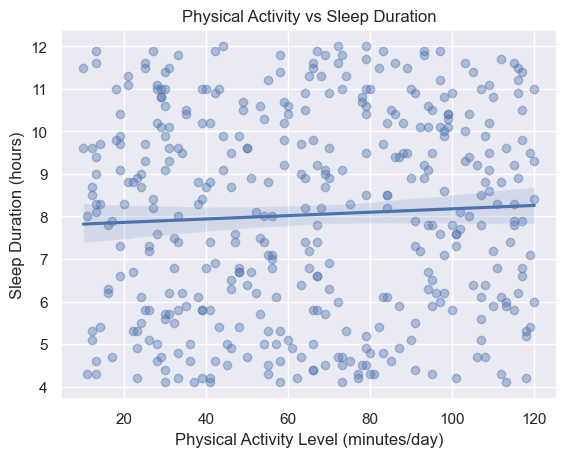

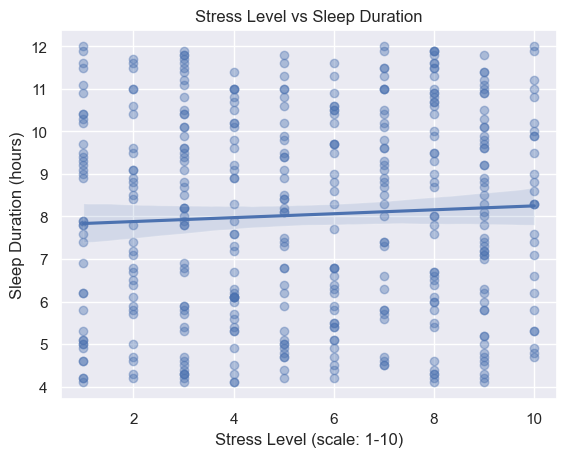

,Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Sleep Duration (hours)
Physical Activity Level (minutes/day),1.000000,-0.00216,0.053806
Stress Level (scale: 1-10),-0.002160,1.00000,0.054120
Sleep Duration (hours),0.053806,0.05412,1.000000


In [65]:
sns.regplot(data=sleep_transformed, x='Physical Activity Level (minutes/day)', y='Sleep Duration (hours)', scatter_kws={'alpha':0.4})
plt.title("Physical Activity vs Sleep Duration")
plt.show()

sns.regplot(data=sleep_transformed, x='Stress Level (scale: 1-10)', y='Sleep Duration (hours)', scatter_kws={'alpha':0.4})
plt.title("Stress Level vs Sleep Duration")
plt.show()

sleep_transformed[['Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)', 'Sleep Duration (hours)']].corr()

<h3> Insights</h3>
According to the regression plots and the correlation matrix, there is little to no links between Physical Activity Level, Stress Levels, and Sleep Duration. Here are the analysis between each factors:
    - The correlation value of -0.002 between Physical Activity Level and Stress Level indicates that there is no correlation between them.
    - The 0.054 correlation value of Physical Activity Level and Sleep Duration shows that there is a very small relationship between them but not conclusive enough to support the claim of relationship.
    - There isn't also enough value to show a relationship between Stress Level and Sleep Duration since the correlation value is only 0.05412
The regression plots also show an almost flat line, indicating a low relationship between all factors.

<h3>❔<i>Do individuals with better cardiovascular indicators (e.g. lower heart rate, normal blood pressure) sleep better?</i></h3>